## Импортируем нужные библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

## Создаем и визуализируем данные

In [4]:
eta=1
# feature
X  = np.random.rand(100,1)
# target
Y = 2 + 3*X + eta*np.random.rand(100,1)

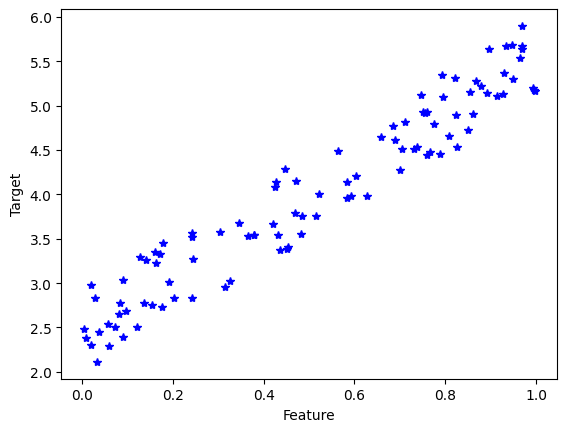

In [6]:
plt.plot(X,Y,'*b')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Рассчитаем коэффициенты линейной регрессии и предскажем таргеты

In [7]:
X_with_ones = np.concatenate((np.ones((100,1)), X), 1)

In [8]:
theta = np.linalg.pinv(X_with_ones).dot(Y)

In [9]:
theta

array([[2.43329194],
       [3.07410515]])

In [10]:
Y_pred = X_with_ones.dot(theta)

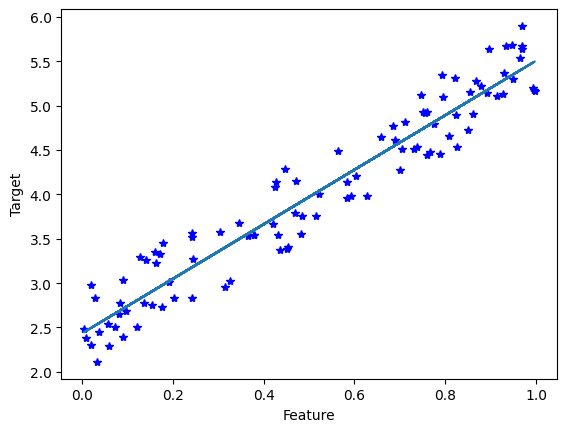

In [11]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Сделаем то же самое с помощью библиотеки sklearn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
lr = LinearRegression(fit_intercept=False)

In [19]:
lr.fit(X_with_ones, Y)

NameError: name 'lr' is not defined

In [15]:
Y_pred_sklearn = lr.predict(X_with_ones)

In [16]:
lr.intercept_, lr.coef_

(0.0, array([[2.43329194, 3.07410515]]))

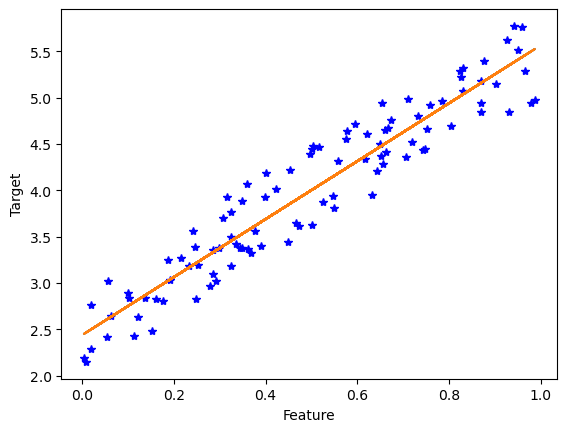

In [24]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.plot(X,Y_pred_sklearn)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Модель для задачи с несколькими признаками

In [27]:
eta=1
# feature
X  = np.random.rand(100,4)
# target
Y = np.reshape(2 + 3*X[:,0] + 4*X[:,1] + 5*X[:,2] + 6*X[:,3],(100,1)) + eta*np.random.rand(100,1)

In [28]:
Y.shape

(100, 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
lr.intercept_, lr.coef_

(array([2.51801617]),
 array([[2.88826493, 3.96758735, 5.04117058, 6.01334765]]))

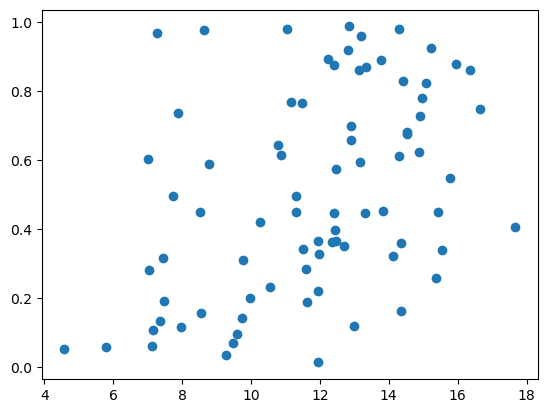

In [38]:
plt.plot(y_train, X_train[:,0], 'o')

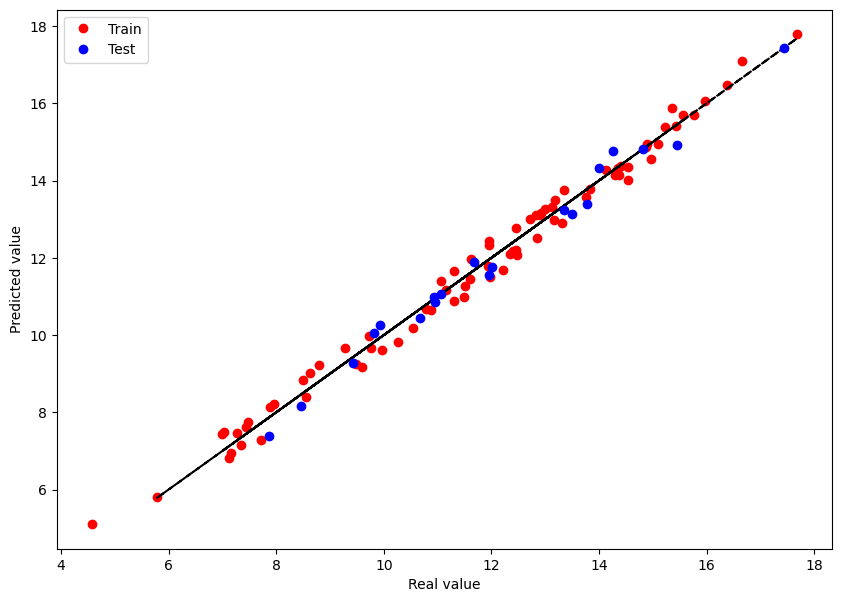

In [35]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'or', label='Train')
plt.plot(y_train[::3], y_train[::3], '--k')
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

## Расчет метрики ошибки

In [17]:
from sklearn.metrics import mean_squared_error as mse

In [204]:
mse(y_test, lr.predict(X_test), squared=False)

0.2478697709940434

In [205]:
np.sqrt(mse(y_test, lr.predict(X_test)))

0.2478697709940434

## Домашнее задание:

Обучить линейную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
df = pd.read_csv('./Databases/Steels_kaggle.csv')

In [3]:
df

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28,65
911,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28,68
912,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29,72
913,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30,78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [5]:
target_class = ' 0.2% Proof Stress (MPa)'
y = df[target_class]
X = df.drop(np.hstack([df.columns[0], df.columns[16:]]), axis=1)

# scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Построим карту корреляций между признаками

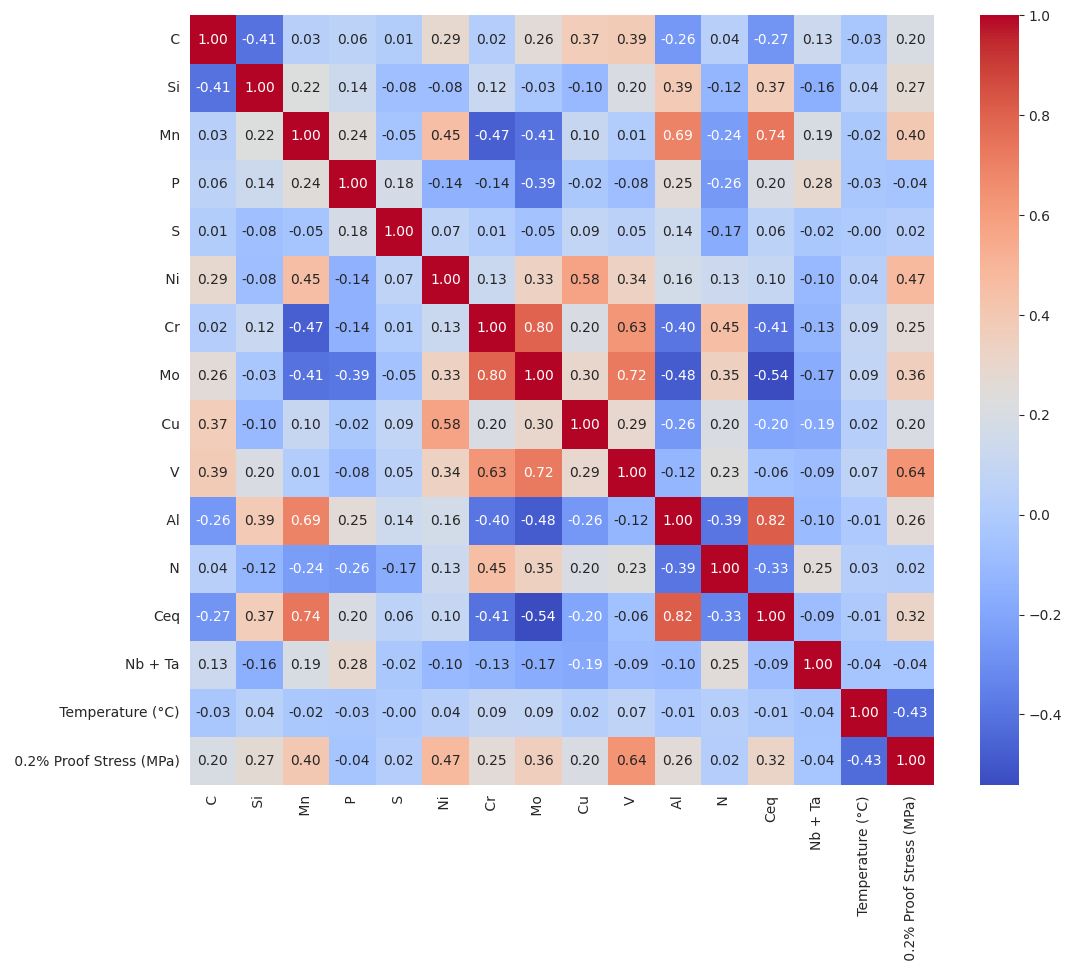

In [6]:
plt.figure(figsize=(12, 10))
# sns.heatmap(df.drop('Alloy code', axis=1).corr(), cmap='coolwarm', annot=True, fmt='.2f');
sns.heatmap(df.drop(np.hstack([df.columns[0], df.columns[17:]]), axis=1).corr(), cmap='coolwarm', annot=True, fmt='.2f');

Отсюда уже можно сказать, что на текучесть влияют преимущественно $Mn, Ni, Cr, Mo, V, Al, Ceq$. И при этом многие фичи имеют зависимость между друг другом, что может помешать стандартной линейной регрессии

Рассмотрим датасет на возможные выбросы и избавимся от них при наличии

<Axes: >

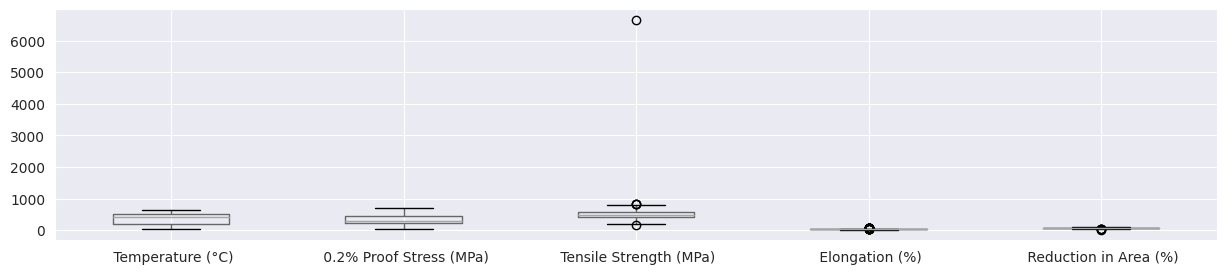

In [7]:
plt.figure(figsize=(15, 3))
df[df.columns[15:]].boxplot()

In [8]:
df[df[' Tensile Strength (MPa)'] > 1000]

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
626,VbF,0.18,0.37,0.66,0.018,0.017,0.1,1.07,1.03,0.12,0.3,0.02,0.0081,0.0,0.0,300,519,6661,11,28


<Axes: >

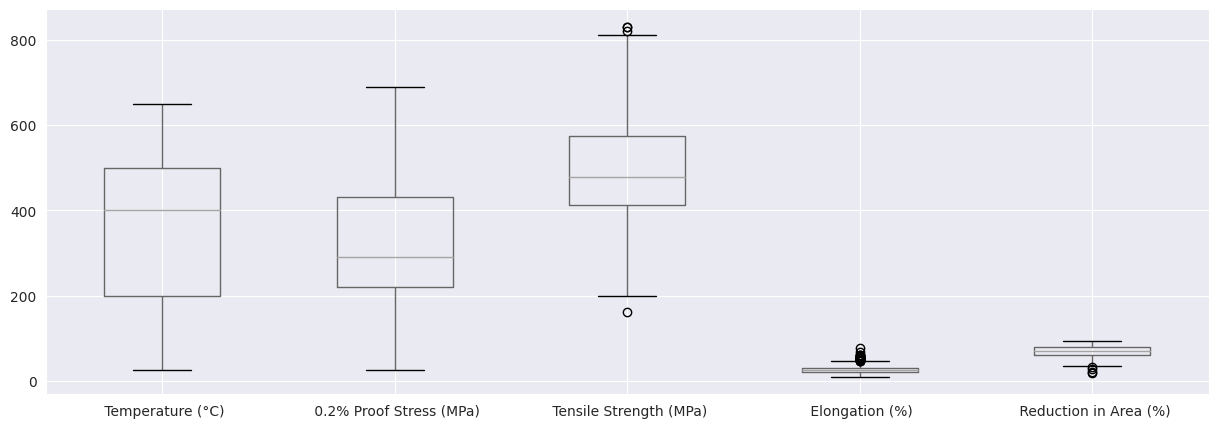

In [9]:
cut_df = df.drop(626)
plt.figure(figsize=(15, 5))
cut_df[df.columns[15:]].boxplot()

In [10]:
cut_df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


Обучим модель используя состав и температуру в качестве признаков

In [102]:
scaler = StandardScaler()

# cut_df[' Temperature (°C)'] = cut_df[' Temperature (°C)'] ** 2
X = cut_df.drop(np.hstack([cut_df.columns[0], cut_df.columns[16:]]), axis=1)
y = cut_df[target_class]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for metric in (r2_score, mean_absolute_percentage_error, mean_squared_error):
    print(metric(y_pred, y_test))

0.818931049912843
0.12025951793265668
2408.1546930148465


In [12]:
df.iloc[X_train.index].head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
807,CbR,0.16,0.29,1.42,0.013,0.006,0.041,0.054,0.011,0.08,0.079,0.006,0.0048,0.429,0.0,350,451,623,25,75
25,MBD,0.10,0.28,0.49,0.008,0.009,0.028,0.900,0.560,0.08,0.000,0.006,0.0090,0.000,0.0,450,252,451,23,78
84,MBL,0.09,0.32,0.48,0.020,0.017,0.023,1.050,0.520,0.04,0.000,0.009,0.0089,0.000,0.0,400,279,482,24,71
10,MBC,0.09,0.37,0.49,0.006,0.005,0.055,0.980,0.570,0.07,0.000,0.005,0.0080,0.000,0.0,27,310,463,34,76
796,CbN,0.12,0.37,1.32,0.012,0.012,0.220,0.030,0.070,0.07,0.040,0.030,0.0064,0.387,0.0,300,372,571,25,68


In [13]:
alloys = cut_df['Alloy code'].value_counts().index[:10]
alloys

Index(['CCB', 'CCA', 'LaD', 'VbA', 'VbN', 'VbM', 'VbJ', 'VbH', 'VbG', 'VbD'], dtype='object', name='Alloy code')

In [14]:
df_train = df.iloc[X_train.index]
df_test = df.iloc[X_test.index]

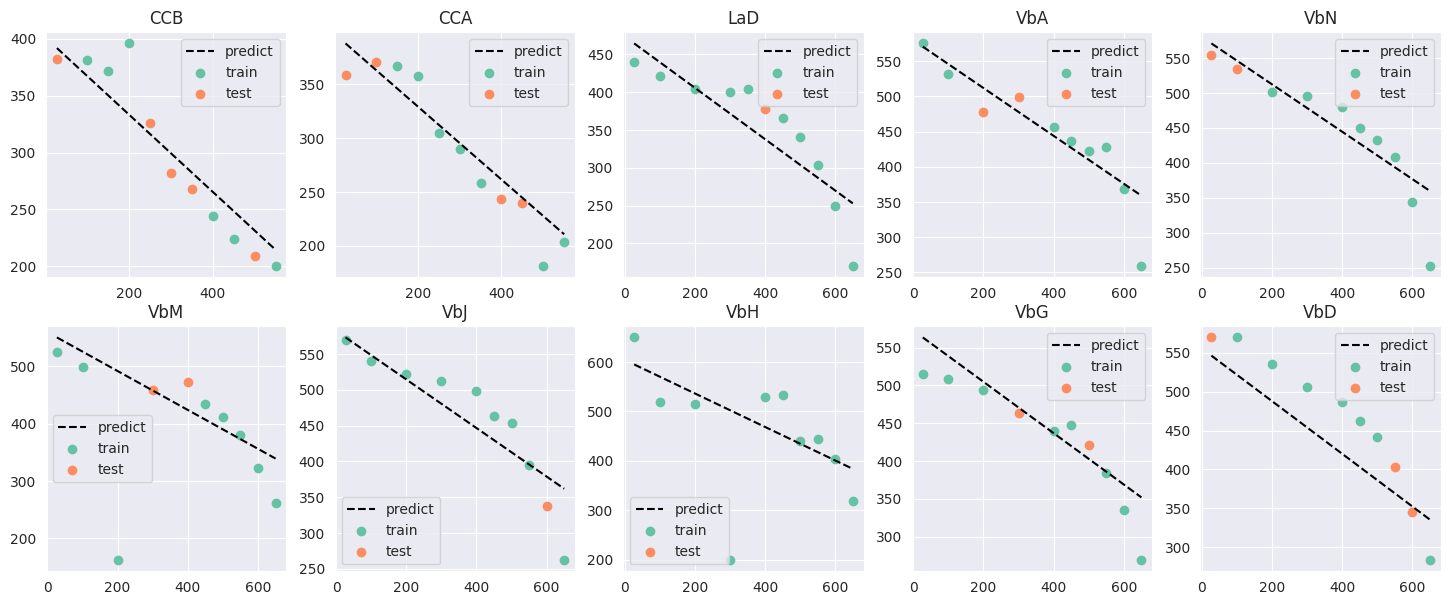

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 7))

for alloy_label, i in zip(alloys, range(10)):
    alloy = df[df['Alloy code'] == alloy_label]
    alloy_test = df_test[df_test['Alloy code'] == alloy_label]
    alloy_train = df_train[df_train['Alloy code'] == alloy_label]
    ax = axs[i // 5][i % 5]
    # ax.scatter(alloy[' Temperature (°C)'], alloy[' 0.2% Proof Stress (MPa)'])
    ax.plot(alloy[' Temperature (°C)'], model.predict(X[cut_df['Alloy code'] == alloy_label]), c='k', linestyle='--', label='predict')
    ax.scatter(alloy_train[' Temperature (°C)'], alloy_train[' 0.2% Proof Stress (MPa)'], label='train')
    ax.scatter(alloy_test[' Temperature (°C)'], alloy_test[' 0.2% Proof Stress (MPa)'], label='test')
    ax.set_title(alloy_label)
    ax.legend()

Как можно заметить линейная регрессия с данной задачей справляется довольно плохо, как минимум потому, что зависимость напрямую от температуры в действительности нелинейная, чтобы использовать линейную регрессию в данном случае, необходимо сделать преобразования над признаками.

#### Кросс-валидация

In [16]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
scores

array([0.84391605, 0.8599852 , 0.75475574, 0.88085355, 0.84302573])

In [17]:
print(f"R2_score: {scores.mean():.2f} +/- {scores.std():.2f}")

R2_score: 0.84 +/- 0.04


### SGDRegressor

In [25]:
sgd_model = SGDRegressor(fit_intercept=True)

param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'], 
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'alpha': [0, 0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 
    'eta0': [0.01, 0.1, 0.5, 1], 
    'max_iter': [1000, 2000, 5000, 8000], 
    'tol': [1e-3, 1e-4, 1e-5],  
}

grid_search = GridSearchCV(sgd_model, param_grid, cv=cv, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 11520 candidates, totalling 57600 fits


/home/masvel/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/masvel/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/masvel/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/masvel/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/masvel/.local/lib/python3.

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
             estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.01, 0.1, 0.5, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive'],
                         'max_iter': [1000, 2000, 5000, 8000],
                         'penalty': ['l2', 'l1', 'elasticnet', None],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='r2', verbose=1)

In [26]:
grid_search.best_params_, grid_search.best_score_

({'alpha': 0.0001,
  'eta0': 1,
  'learning_rate': 'adaptive',
  'loss': 'huber',
  'max_iter': 1000,
  'penalty': 'l1',
  'tol': 1e-05},
 0.7388190798598502)

In [27]:
r2_score(grid_search.best_estimator_.predict(X_test), y_test), r2_score(model.predict(X_test), y_test)

(0.571857452811452, 0.818931049912843)

Результат так себе, но хотя бы r2_score неотрицательный. Странно то, что SGDRegressor имеет хуже точность, чем обычная линейная регрессия, возможно, отбор по кросс-валидации как-то влияет на обучение.

### Собственная реализация

In [87]:
class MyLinearRegression():
    
    def __init__(self, fit_intercept=False, lr = 1e-7, tot=1e-4) -> None:
        
        self.fit_intercept = fit_intercept
        self.theta = None
        self.fitted = False
        self.lr = lr
        self.tot = tot
    
    def fit(self, X, y, max_iter = 1_000_000):
        
        X = np.array(X)
        y = (np.array(y).reshape(-1, 1))
        
        assert len(X) == len(y)
        
        
        if self.fit_intercept == True:
            X = np.hstack([np.ones((len(X), 1)), X])
            
            
        if self.fitted == False:
            self.theta = np.ones((len(X[0]), 1))
            self.fitted = True
        
        
        iter = 0
        while iter <= max_iter:
            iter +=1
            
            # self.lr *= (1 + iter * 1e-8)
            
            grad = - 2 * X.T @ (y - X @ self.theta)
            self.theta -= self.lr * grad
            
            if np.linalg.norm(grad) <= self.tot:
                break
            
            if iter % 20000 == 0:
                print(np.linalg.norm(grad), r2_score(X @ self.theta, y))
                
        
    def predict(self, X):
        X = np.array(X)
        
        if self.fit_intercept:
            X = np.hstack([np.ones((len(X), 1)), X])
        
        return X @ self.theta
        
        

In [55]:
X_t = scaler.fit_transform(X)
y_t = y

# X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, train_size=0.8, random_state=42)

In [93]:

my_model = MyLinearRegression(fit_intercept=True, lr=8e-9, tot=700)
my_model.fit(X_train, y_train, max_iter=2_500_000)

215688.64707072568 -3.3448443775787524
190095.89303147973 -4.085201638052984
167556.60696543576 -4.857819583286261
147707.21741371966 -5.428011598827778
130227.58308485679 -5.465668446600167
114835.81792958031 -4.8368572906045495
101283.73405920531 -3.8000192031321207
89352.82871815526 -2.7393933028346553
78850.75026987851 -1.8663229754930866
69608.18583768465 -1.215778299995847
61476.1199781632 -0.7491235753725247
54323.41965932382 -0.416718325581801
48034.70596031694 -0.17811475866956528
42508.4773860829 -0.004412204372427064
37655.45357520509 0.12413542049141013
33397.111549506306 0.2208755433387195
29664.38959626009 0.2948698139576378
26396.536495964257 0.3523394970619328
23540.086252126715 0.3976164832101641
21047.940929607114 0.43376290102582116
18878.546890091966 0.4629761588457
16995.152859682006 0.4868562706371732
15365.142031020767 0.5065845091552854
13959.43473172869 0.523044445132623
12751.9626355024 0.5369051053583307
11719.2191105101 0.5486788953654562
10839.89176815062 0

In [148]:
# my_model.lr *= 1.5
my_model.fit(X_train, y_train, max_iter=2_000_000)


1730.4855524488391 0.7802978809194295
1727.8484770725622 0.7803630554384365
1725.2181535685086 0.7804280387753593
1722.5945568437437 0.7804928316987048
1719.9776619100153 0.7805574349728714
1717.3674438834262 0.7806218493581758
1714.7638779839551 0.7806860756108742
1712.1669395350577 0.780750114483205
1709.5766039632947 0.7808139667234044
1706.9928467978439 0.7808776330757398
1704.4156436701812 0.7809411142805315
1701.8449703136416 0.7810044110741833
1699.2808025629877 0.7810675241892147
1696.7231163540139 0.7811304543542744
1694.1718877232279 0.7811932022941748
1691.6270928073436 0.7812557687299192
1689.0887078429257 0.781318154378723
1686.5567091660105 0.781380359954043
1684.0310732117073 0.7814423861655976
1681.5117765137738 0.7815042337194021
1678.998795704261 0.781565903317782
1676.492107513103 0.7816273956594026
1673.9916887677198 0.7816887114392983
1671.4975163926624 0.781749851348888
1669.0095674091963 0.7818108160760056
1666.5278189349294 0.7818716063049216
1664.052248183471 0

In [151]:
r2_score(my_model.predict(X_test), y_test), r2_score(model.predict(X_test), y_test)

(0.7875398789291652, 0.818931049912843)

Резултат получился довольно близким к тому, что у модели `scikit-learn`. Вероятно, если сделать ещё несколько миллионов итераций, регрессия обучится настолько же. `learning rate` не получилось сделать выше, несмотря на попытки, при увеличении до 9e-9, коэффициенты сразу расходятся. Для того, чтобы это избежать, можно скейлить данные, но я этого не делал, чтобы была возможность сравнить коэффициенты.

In [150]:
pd.DataFrame(np.hstack([np.hstack([['Intercept'], X.columns.to_numpy()]).reshape(16, 1), 
                        my_model.theta, np.hstack([[model.intercept_], model.coef_]).reshape(16, 1),
                        np.hstack([[np.nan], df.drop(np.hstack([df.columns[0], df.columns[17:]]), axis=1).corr()[' 0.2% Proof Stress (MPa)'].round(2).to_numpy()[:-1]]).reshape(16, 1)]), 
                        columns=['Features', 'MyRegression', 'Sklearn', 'Corr'])

,Features,MyRegression,Sklearn,Corr
0,Intercept,154.919721,261.046082,NaN
1,C,95.443331,107.84515,0.2
2,Si,104.390198,113.363131,0.27
3,Mn,144.151693,45.998474,0.4
4,P,2.360771,-970.949906,-0.04
5,S,5.83875,-512.43611,0.02
6,Ni,25.452861,101.653625,0.47
7,Cr,21.846974,3.000663,0.25
8,Mo,179.60385,129.310504,0.36
9,Cu,-17.985598,16.238003,0.2


Заметим, что чем меньше влияют коэффициенты на результат, тем больше различие между соответствующими коэффициентами.